In [4]:
import requests
import pandas as pd
import dash
from dash import dcc
from dash import html
import plotly.express as px
from io import StringIO
import plotly.graph_objs as go

In [5]:
def fetch_data(endpoint):
    url = f"http://apps.who.int/gho/athena/api/GHO/{endpoint}?format=csv"
    response = requests.get(url)
    print(f'Fetched data for {endpoint}')
    csv_data = StringIO(response.content.decode('utf-8'))
    df = pd.read_csv(csv_data)
    df = keep_most_recent_date(df).loc[:, ['COUNTRY', 'YEAR', 'Numeric','REGION']]
    return df

def keep_most_recent_date(df):
    df = df.sort_values(by=['COUNTRY', 'YEAR'], ascending=[True, False])
    df = df.drop_duplicates(subset='COUNTRY', keep='first')
    return df

In [6]:
stunting = "NUTRITION_ANT_HAZ_NE2"

In [7]:
df = fetch_data(stunting)


Fetched data for NUTRITION_ANT_HAZ_NE2


In [52]:
df.groupby('COUNTRY')['Numeric'].mean().reset_index().sort_values(by='Numeric', ascending=False).iloc[:5,:]

,COUNTRY,Numeric
42,ERI,52.5
7,BDI,50.9
107,PNG,49.5
136,TLS,46.7
54,GTM,46.7


In [44]:
grouped_df = df.groupby('COUNTRY')['Numeric'].mean().reset_index()
max_index = grouped_df['Numeric'].idxmax()
most_affected_country = grouped_df.loc[max_index,'COUNTRY']
df['YEAR'] = df['YEAR'].astype(int)
df[df['COUNTRY'] == most_affected_country].groupby('YEAR')['Numeric'].mean().reset_index(drop=False).sort_values(by="YEAR")

,YEAR,Numeric
0,2010,52.5


In [53]:
gdp_spending = fetch_data('GHED_GGHE-DGDP_SHA2011')
def format_malnutrition_data(df):
    df = keep_most_recent_date(df).loc[:, ['COUNTRY', 'YEAR', 'Numeric','REGION']]
    return df

recent_gdp_spending = format_malnutrition_data(gdp_spending)

Fetched data for GHED_GGHE-DGDP_SHA2011


In [57]:
malnutrition_data = fetch_data(stunting)
recent_malnutrition_data = format_malnutrition_data(malnutrition_data)


Fetched data for NUTRITION_ANT_HAZ_NE2


In [76]:
recent_malnutrition_data = recent_malnutrition_data.rename(columns = {'Numeric':'Malnutrition'})
recent_gdp_spending = recent_gdp_spending.rename(columns = {'Numeric':'GDP'})

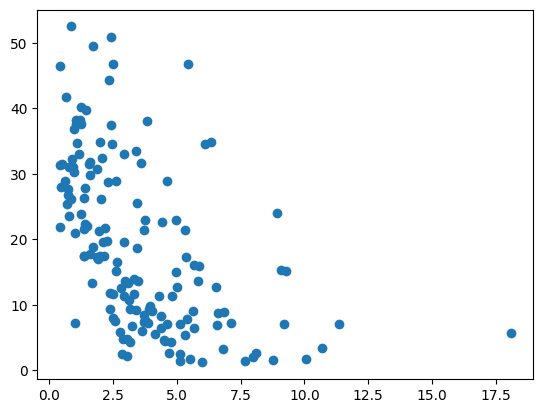

In [78]:
merg = recent_gdp_spending.merge(recent_malnutrition_data, left_on = 'COUNTRY', right_on='COUNTRY')
import matplotlib.pyplot as plt
plt.scatter(merg['GDP'], merg['Malnutrition'])

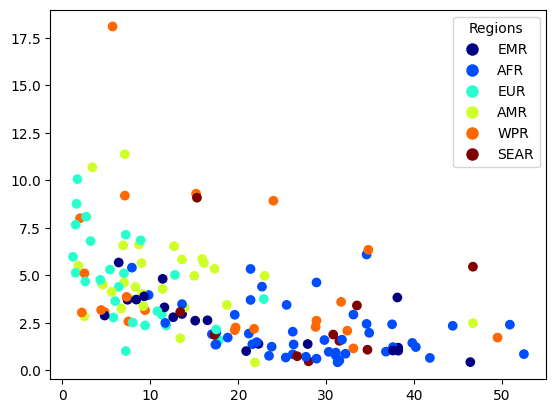

In [71]:
import numpy as np
# Creating a colormap - this maps each unique region to a distinct color
unique_regions = merg['REGION_x'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_regions)))
colormap = dict(zip(unique_regions, colors))

# Scatter plot
plt.scatter(merg['Numeric_y'], merg['Numeric_x'], c=merg['REGION_x'].map(colormap))

# Creating a custom legend for the regions
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', label=region, markersize=10, markerfacecolor=colormap[region]) for region in unique_regions]
plt.legend(handles=legend_elements, title="Regions")

In [79]:
import requests
import pandas as pd
import dash
from dash import dcc
from dash import html
import plotly.express as px
from io import StringIO
import plotly.graph_objs as go
fig = px.scatter(merg, 
                x='GDP', 
                y='Malnutrition', 
                color='REGION_x',
                trendline='ols',
                title="Scatter plot colored by REGION",
                labels={'Malnutrition': '%', 'GDP': 'Domestic general government health expenditure (GGHE-D) as percentage of gross domestic product (GDP) (%)'})

fig.show()

ModuleNotFoundError: No module named 'statsmodels'

In [60]:
selected_gdp = recent_gdp_spending[recent_gdp_spending['REGION'] =="EMR"]
selected_malnut = recent_malnutrition_data[recent_malnutrition_data['REGION']=='EMR']

In [61]:
selected_malnut

,COUNTRY,YEAR,Numeric,REGION
511,AFG,2018,38.2,EMR
20,BHR,1995,13.6,EMR
815,DJI,2019,20.9,EMR
570,EGY,2014,22.3,EMR
87,IRN,2017,4.8,EMR
600,IRQ,2018,12.6,EMR
860,JOR,2019,7.4,EMR
874,KWT,2017,6.4,EMR
878,LBN,2004,16.5,EMR
880,LBY,2014,38.1,EMR
